# Chap04 - 아무도 알려주지 않는 위대한 이론

## 4.1 서론

이번 장은 통계학 책에서는 거의 나오지 않는 아이디어에 대해 다뤄 본다.

## 4.2 큰 수의 법칙 - The Law of Large Numbers

$Z_i$를 어떤 확률분포에서 얻은 $N$개의 독립 표본이라고 하면, 큰 수의 법칙에 따라 기대값 $\text{E}[Z]$는 다음과 같이 나타낼 수 있다.

$$
\frac{1}{N} \sum _{ i=1 }^{ N }{ Z_i } \rightarrow E \left[ Z \right], \quad N\rightarrow  \infty 
$$

위의 식을 말로 표현하면,

> ***같은 분포에서 나온 확률변수집합의 평균은 그 분포의 기대값으로 수렴한다.***

### 4.2.1 직관

큰 수의 법칙에 대해 간단한 예제를 사용하여 알아보자.

확률변수 $Z$는 두 가지 값, 즉 $c_1$ 또는 $c_2$만 가질 수 있고, $Z$ 표본을 많이 가지고 있다고 가정하고, 특정 표본을 $Z_i$라고 표시한다. 큰 수의 법칙에 따르면 모든 표본의 평균을 구하여 $Z$의 기대값에 가까운 값을 구할 수 있다. 평균은 다음과 같다.

$$
\frac{1}{N} \sum _{ i=1 }^{ N }{ Z_i }
$$

수식을 풀어보면, $Z_i$가 $c_1$ 또는 $c_2$만 가지므로 전체의 합을 이 두값에 대한 합으로 나눌 수 있다.

$$
\begin{eqnarray} \frac { 1 }{ N } \sum _{ i=1 }^{ N }{ Z_{ i } }  & = & \frac { 1 }{ N } \left( \sum _{ Z_{ i }=c_{ 1 } }^{  }{ c_{ 1 } } +\sum _{ Z_{ i }=c_{ 2 } }^{  }{ c_{ 2 } }  \right)  \\  & = & c_{ 1 }\sum _{ Z_{ i }=c_{ 1 } }^{  }{ \frac { 1 }{ N }  } +c_{ 2 }\sum _{ Z_{ i }=c_{ 2 } }^{  }{ \frac { 1 }{ N }  }  \\  & = & c_1 \times (\text{approximate frequency of } c_1) + c_2 \times (\text{approximate frequency of } c_2) \\  & \approx & c_1 \times P(Z = c_1) + c_2 \times P(Z=c_2) \\  & = & E[Z] \end{eqnarray}
$$

$N \rightarrow \infty$ 일 경우 등호($=$)가 유효하다. 큰 수의 법칙은 거의 모든 분포에 유효하다. 

### 4.2.2 예제: 푸아송 확률변수의 수렴

`sample_size = 100000`로 모수 $\lambda = 4.5$인 푸아송 확률변수를 표본추출하자(푸아송 확률변수의 기대값은  그 모수와 같다). $n=1$ 부터 `sample_size`까지 첫 표본 $n$개의 평균을 계산해보자.

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pymc as pm
from IPython.core.pylabtools import figsize

matplotlib.rc('font', family='NanumGothic')  # Linumx
# matplotlib.rc('font', family='AppleGothic')  # Mac

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

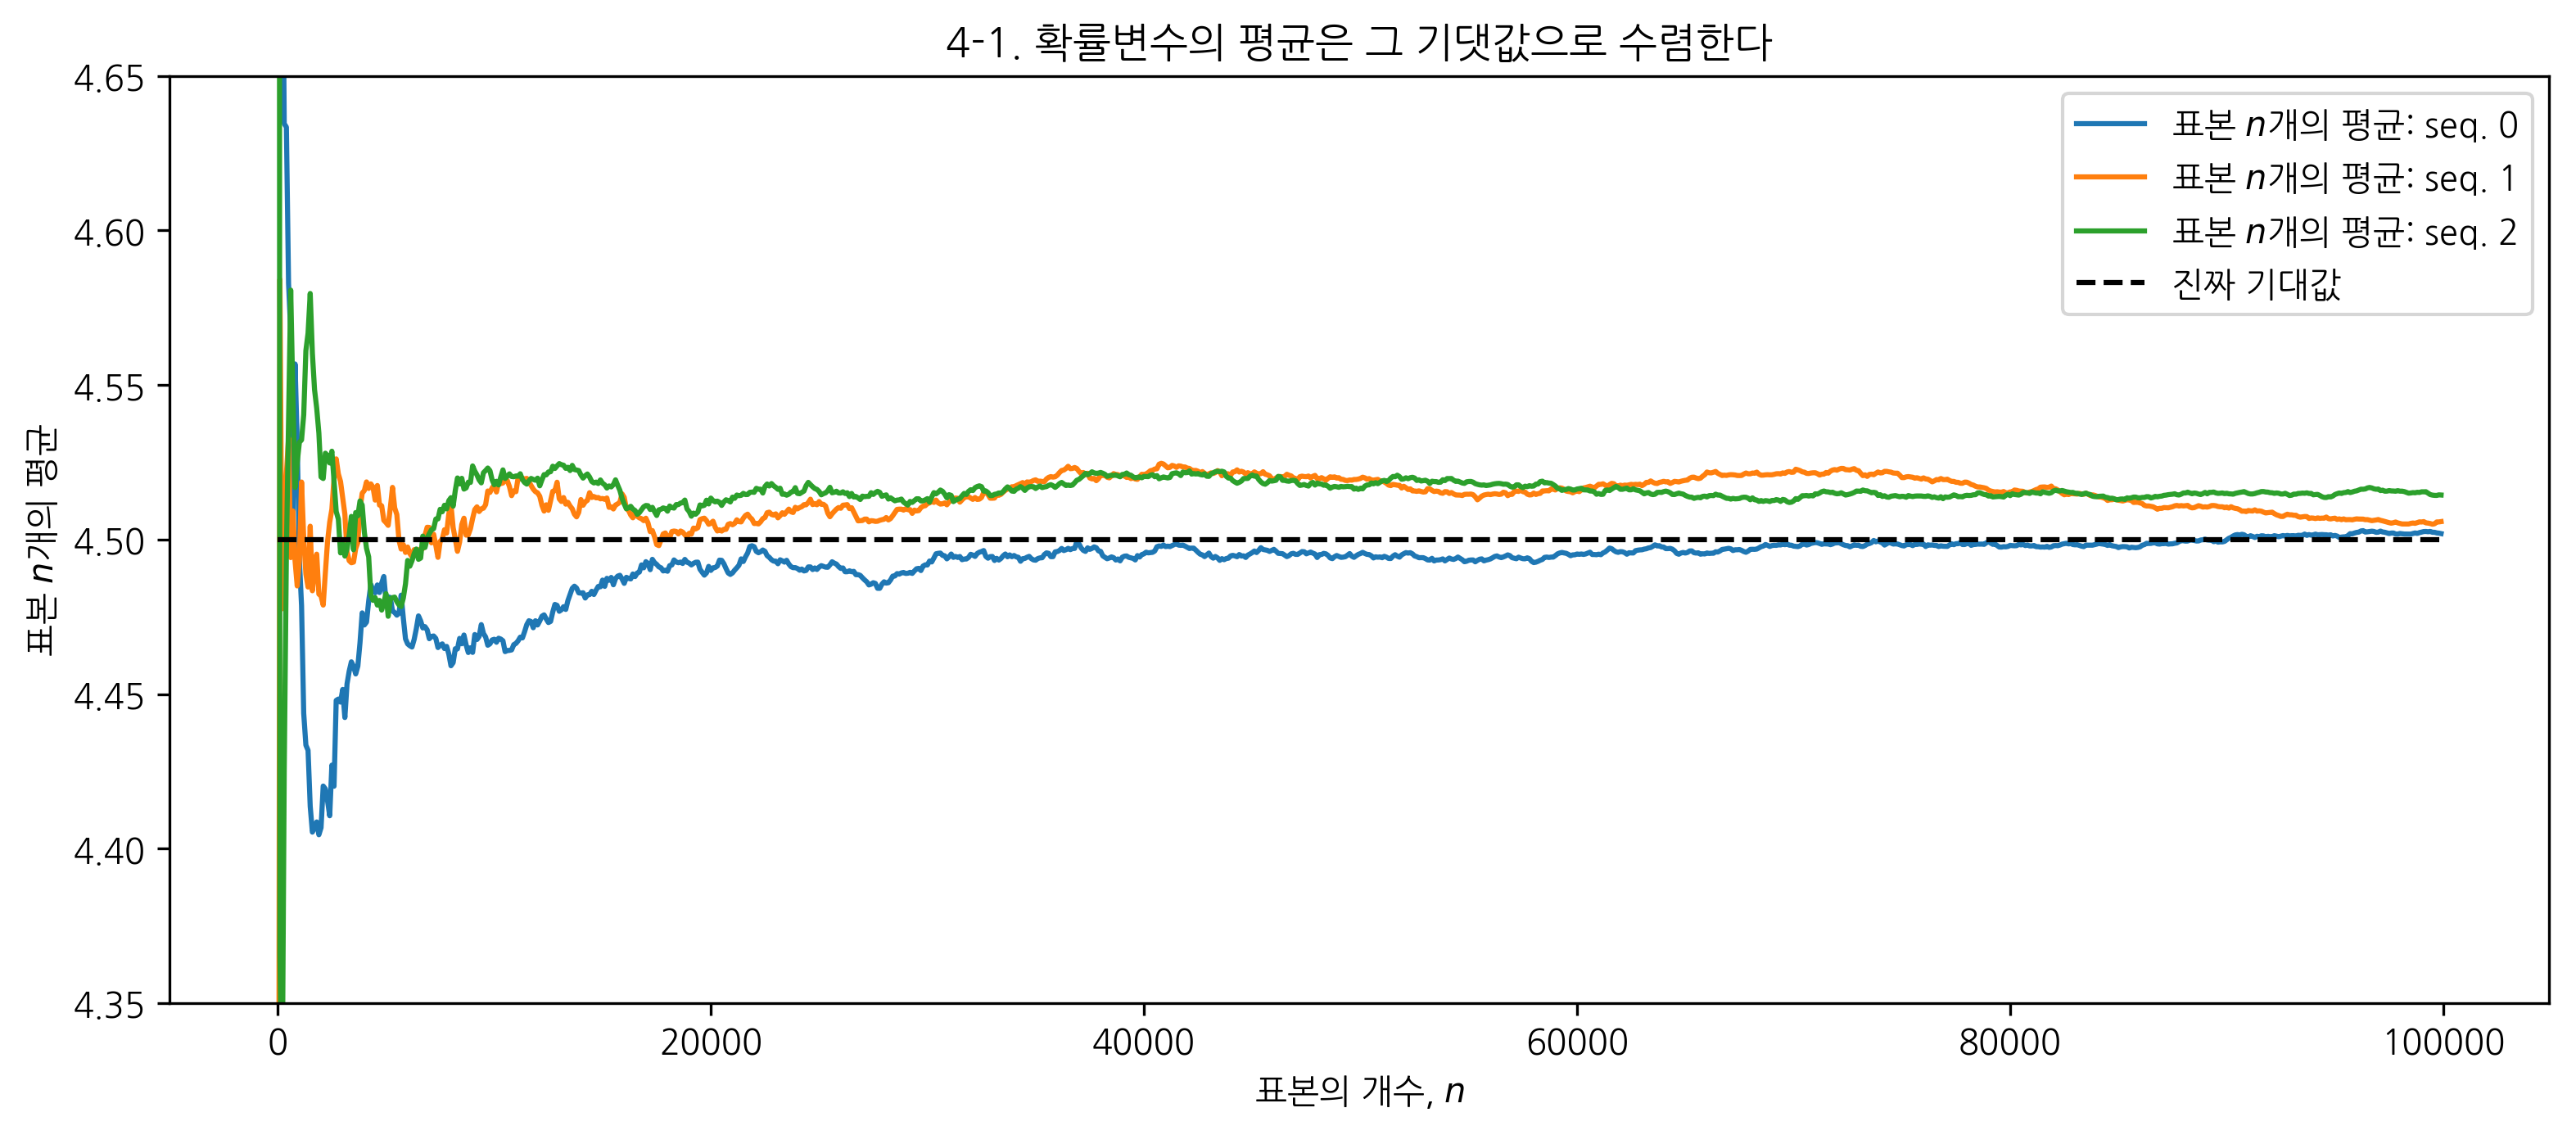

In [29]:
figsize(12.5, 5)

sample_size = 100000
expected_value = lambda_ = 4.5

poi = pm.rpoisson
# 1, 101, 201, ~ 
N_samples = range(1, sample_size, 100)

for k in range(3):
    samples = poi(lambda_, size=sample_size)
    partial_average = [samples[:i].mean() for i in N_samples]
    plt.plot(N_samples, partial_average, lw=1.5, label='표본 $n$개의 평균: seq. %d' % k)

plt.plot(N_samples, expected_value * np.ones_like(partial_average), 
        ls="--", label='진짜 기대값', c='k')
plt.ylim(4.35, 4.65)
plt.title("4-1. 확률변수의 평균은 그 기댓값으로 수렴한다")
plt.ylabel("표본 $n$개의 평균")
plt.xlabel("표본의 개수, $n$")
plt.legend();

위의 그래프에서 표본의 크기가 작을 때 평균의 변동이 크다는 것을 알 수 있다. 위의 세 개의 표본 $n$개의 평균은 모두 $4.5$로 **수렴(convergence)**한다.

그러면, 다음의 질문에 대해 생각해 보자.

> **"얼마나 빨리 기대값에 수렴할 수 있는가?"**

특정 $n$에 대해 수천 번의 시행을 하고, 진짜 기대값에서 평균이 얼마나 떨어져 있는지 계산해보자. 

$$
D(n) = \sqrt { E\left[ \left( \frac { 1 }{ n } \sum _{ i=1 }^{ n }{ Z_{ i } } -4.5 \right) ^{ 2 } \right] } 
$$

위의 수식은 어떤 $n$의 진짜 값(평균)에서 떨어진 거리로 해석할 수 있다. 위의 식을 다음과 같이 나타낼 수 있다.

$$
Y_{n, k} = \left( \frac { 1 }{ n } \sum _{ i=1 }^{ n }{ Z_{ i } } -4.5 \right)^{2}
$$

$Y_{n, k}$를 여러 번 계산하는데, 매 계산마다 새로운 $Z_i$를 가지고 계산한 다음, 평균을 계산한다.

$$
\frac{1}{N} \sum _{ i=1 }^{ n }{Y_{n,k}} \rightarrow E[Y_n] = E\left[ \left( \frac { 1 }{ n } \sum _{ i=1 }^{ n }{ Z_{ i } } -4.5 \right) ^{ 2 } \right]
$$

마지막에 제곱근을 취하면 다음과 같다.

$$
\sqrt{\frac{1}{N} \sum _{ i=1 }^{ n }{Y_{n,k}}} \approx D(n)
$$

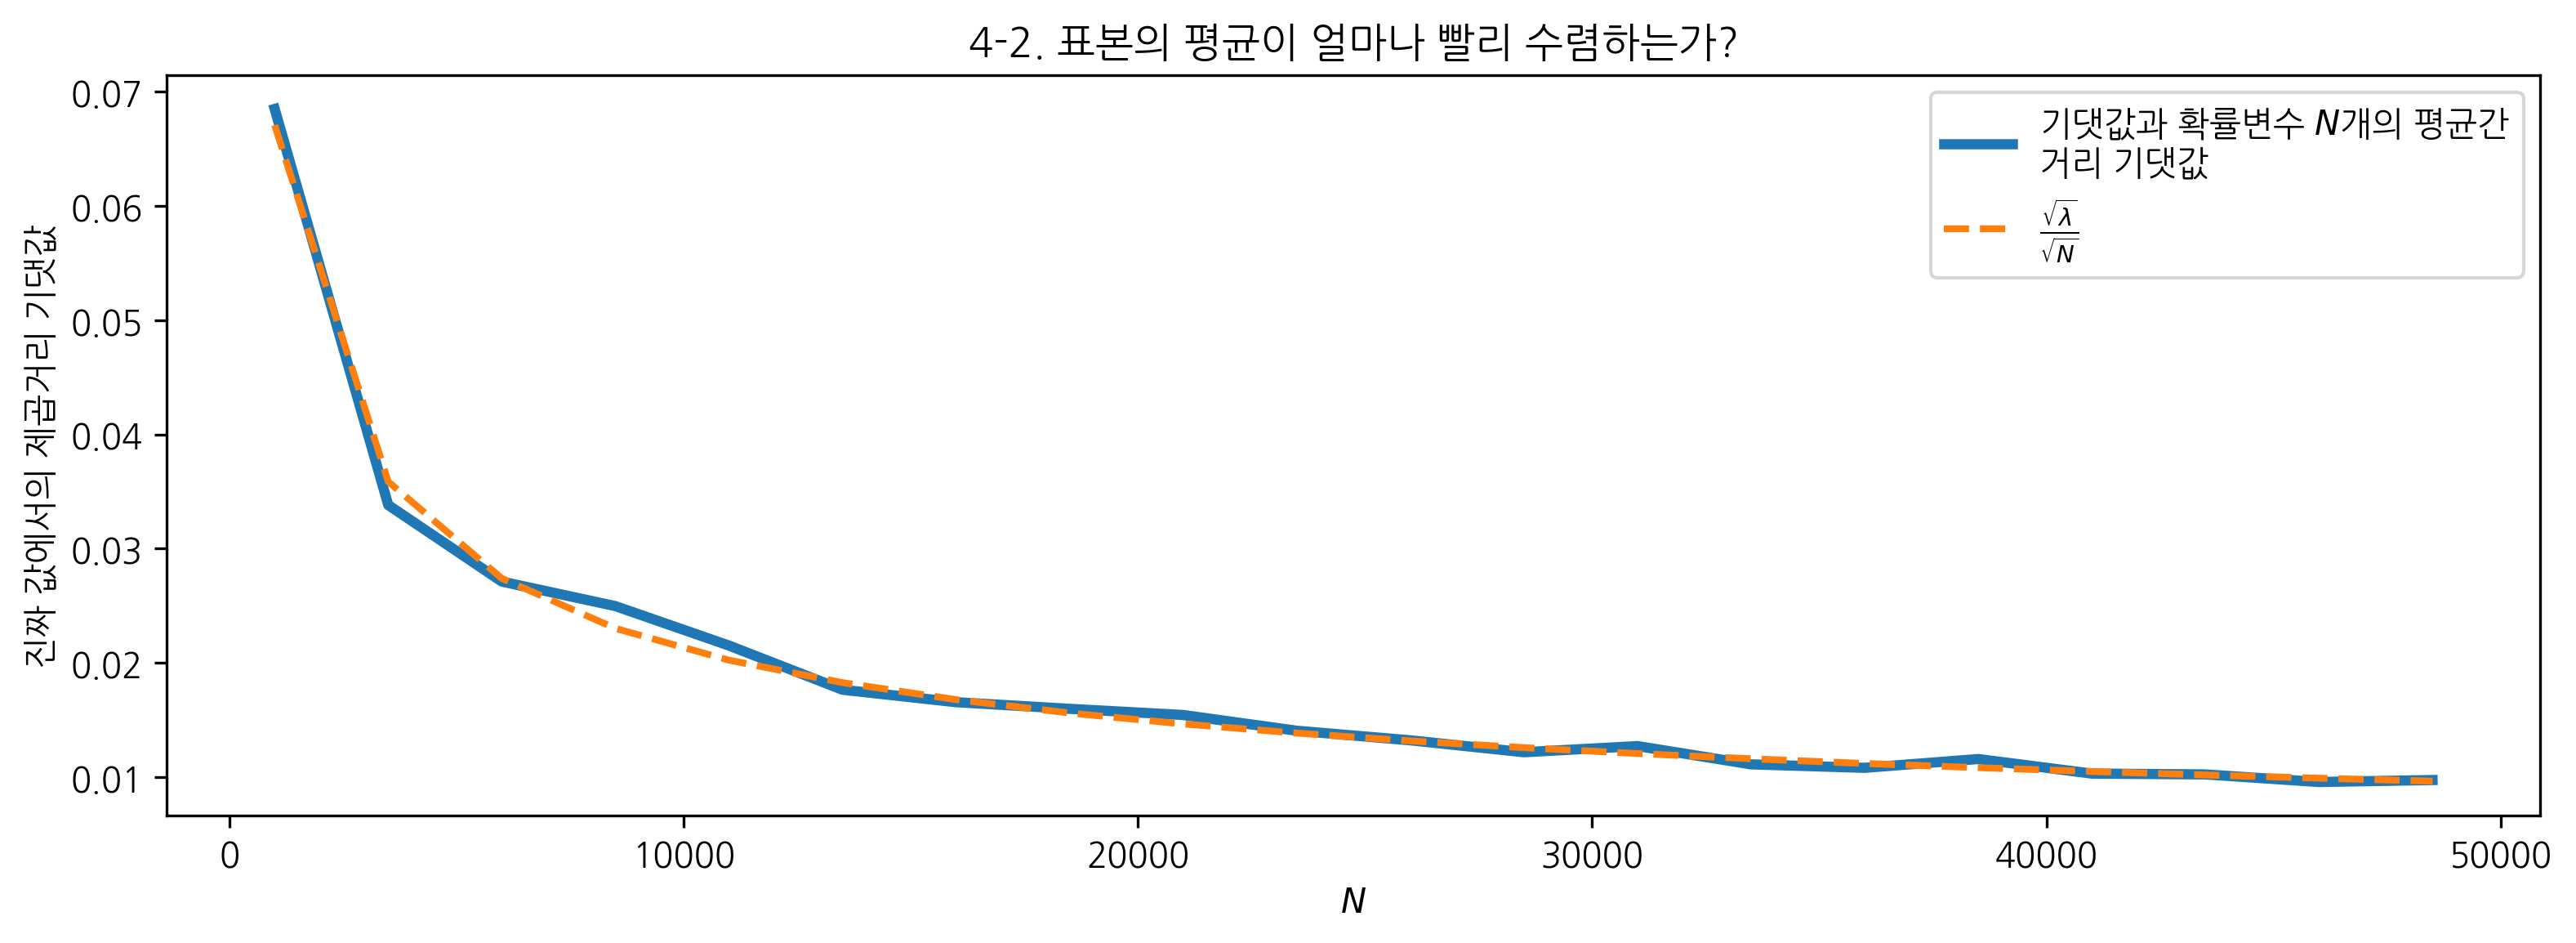

In [30]:
figsize(12.5, 4)

N_Y = 250  # D(N)에 근사하기 위해 크게 잡는다.
N_array = np.arange(1000, 50000, 2500)  # 변수에 많은 표본을 근사
D_N_results = np.zeros(len(N_array))

lambda_ = 4.5
expected_value = lambda_

def D_N(n):
    '''이 함수는 표본 n개를 사용한 평균분산인 D_n에 근사한다.'''
    Z = poi(lambda_, size=(n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value)**2).mean())

for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)
    
plt.xlabel("$N$")
plt.ylabel("진짜 값에서의 제곱거리 기댓값")
plt.plot(N_array, D_N_results, lw=3,label="기댓값과 확률변수 $N$개의 평균간\n거리 기댓값")
plt.plot(N_array, np.sqrt(expected_value) / np.sqrt(N_array), lw=2, ls="--",
         label=r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$")
plt.legend()
plt.title("4-2. 표본의 평균이 얼마나 빨리 수렴하는가?");

위의 그래프에서 알 수 있듯이 표본의 평균과 실제 기대값 사이의 거리(차이)는 $N$이 증가할수록 줄어든다. 여기서 수렴률이 감소하는 것에 주목해보자. 즉, 0.020에서 0.015(0.005의 차이)로 이동하기 위해 추가 표본 10,000개가 필요하다. 그리고 거기에 표본 20,000개를 더하면 0.015에서 0.010으로 줄어든다.

In [27]:
print(np.sqrt(expected_value) / np.sqrt(10000), 
      '→', np.sqrt(expected_value) / np.sqrt(20000),
      '→', np.sqrt(expected_value) / np.sqrt(40000))

0.021213203435596423 → 0.014999999999999998 → 0.010606601717798212


따라서, 수렴률을 측정할 수 있다. 위의 그래프에서 주황색 점선, 함수 $\frac{\sqrt{\lambda}}{\sqrt{N}}$을 그렸다. 대개의 경우 $Z$와 같은 일련의 확률변수가 주어지면 **큰 수의 법칙**에서 $E[Z]$의 수렴률은 다음과 같다.

$$
\frac{\sqrt{Var[Z]}}{\sqrt{N}}
$$

### 4.2.3 $\text{Var}(Z)$를 어떻게 계산할까?

분산은 근사치가 될 수 있는 또 다른 기대값이라 할 수 있다. 

기대값(큰 수의 법칙을 사용하여 추정하고, 이를 $\mu$로 표시)을 알면 분산을 추정할 수 있다.

$$
\frac{1}{N} \sum _{ i=1 }^{ N }{ \left( Z_{ i }-\mu  \right)^{2}} \rightarrow E\left[ \left( Z-\mu \right)^{2}  \right] = \text{Var}(Z) 
$$

### 4.2.4 기대값과 확률

기대값과 추정한 확률 사이에는 명확한 관계가 보이지 않는다. **지시함수**(indicator function)을 다음과 같이 정의해보자.

$$
\nVdash =\begin{cases} 1\quad x \in A \\ 0 \quad else \end{cases}
$$

큰 수의 법칙에 따라 표본 $X_i$가 많으면 다음과 같이 $P(A)$라고 표시한 사건 $A$의 확률을 추정할 수 있다.

$$
\frac{1}{N} \sum _{ i=1 }^{ N }{ \nVdash_A(X_i) } \rightarrow E\left[ \nVdash_A(X) \right] = P(A) 
$$

위의 식에서 지시함수는 사건이 발생한 경우에만 1을 가지므로, 사건이 발생한 횟수만 합친 뒤 전체 시행의 수로 나눈다(보통 빈도를 사용하여 확률을 추정한다). 

예를 들어 $Z \sim \text{Exp}(0.5)$가 $10$보다 클 확률을 추정하고 싶고, $\text{Exp}(0.5)$ 분포에서 표본을 많이 얻었다고 하자.

$$
P(Z > 10) = \sum _{ i=1 }^{ N }{ \nVdash_{z>10}(Z_i) } 
$$

In [28]:
# import pymc as pm

N= 10000
print(np.mean([pm.rexponential(0.5) > 10 for i in range(N)]))

0.0059


### 4.2.5 이 모든 것이 베이지안 통계와 무슨 상관이 있을까?

만약 사후확률분포에서 직접 표본을 얻을 수 있다면, 필요한 것은 단지 평균을 계산하는 것뿐이다. 

- 정확도가 우선이라면, 얼마나 빨리 수렴하는지 보여주면 된다. → 그래프 4-2
- 더 정확하기를 원한다면 사후확률분포에서 표본을 더 가져오면 된다.

> 언제쯤이면 충분할까? 사후확률분포에서 표본을 추출하는 것을 언제 멈추어야 할까?

위의 질문에 대한 답은 실무자의 의사결정과 표본의 분산에 달려있다(큰 분산은 평균이 느리게 수렴한다.)

또한, 큰 수의 법칙이 통하지 않는 경우도 알아야 한다. 이름 자체에서 알 수 있듯이 이 법칙은 표본의 수가 많을 때만 통한다. 

## 4.3 작은 수의 혼란